# Dependencies

In [1]:
pacman::p_load(factoextra, dplyr)

# Functions

# Paths

In [2]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [3]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [4]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [5]:
table(meta_div$sampletype)


 PBMC Tumor cfDNA 
  221    17   266 

In [6]:
meta_div <- meta_div[ meta_div$sampletype == "PBMC",]

In [7]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,basename,file,sampletype,Group,log10shann
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
287,CHP_10YO_M_00,CHP_10YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,10.601,0.073,8.556,8.561,0.094,CHP_10YO-M_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_10YO-M_PBMC_DNA.txt,PBMC,CHP,1.0249370
288,CHP_11YO_M_00,CHP_11YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,11.614,0.054,10.406,10.414,0.066,CHP_11YO-M_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_11YO-M_PBMC_DNA.txt,PBMC,CHP,1.0647200
289,CHP_15YO_F_A_00,CHP_15YO_F_A,X00,NA,NA,NA,Normal,NA,NA,NA,...,8.989,0.036,8.560,8.570,0.060,CHP_15YO-F-A_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-A_PBMC_DNA.txt,PBMC,CHP,0.9533731
290,CHP_15YO_F_B_00,CHP_15YO_F_B,X00,NA,NA,NA,Normal,NA,NA,NA,...,6.334,0.040,5.870,5.876,0.066,CHP_15YO-F-B_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-F-B_PBMC_DNA.txt,PBMC,CHP,0.8014037
291,CHP_15YO_M_00,CHP_15YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,21.120,0.040,20.321,20.339,0.068,CHP_15YO-M_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_15YO-M_PBMC_DNA.txt,PBMC,CHP,1.3244882
292,CHP_16YO_M_00,CHP_16YO_M,X00,NA,NA,NA,Normal,NA,NA,NA,...,3.973,0.007,3.944,3.946,0.013,CHP_16YO-M_PBMC_DNA,batchNormal_16Apr2020/mixcr/clones/CLONES_TRBCHP_16YO-M_PBMC_DNA.txt,PBMC,CHP,0.5990092


In [8]:
int_v_j_cdr3_l <- readr::read_rds(paste0(datapath, "capTCRseq/int_pbmc_v_j_cdr3_l.rds"))

In [10]:
head(int_v_j_cdr3_l)

,basename,aaSeqCDR3,cdr3_length,TRBV,TRBJ,cloneCount,cloneFraction
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>
1,CHP_10YO-M_PBMC_DNA,CASSQYTADTQYF,13,TRBV13,TRBJ2-3,3012,0.20644277
2,CHP_10YO-M_PBMC_DNA,CASSDGRYGRDSNTEAFF,18,TRBV2,TRBJ1-1,1590,0.10897875
3,CHP_10YO-M_PBMC_DNA,CASSLNSGGTYGYTF,15,TRBV12-4,TRBJ1-2,1301,0.08917066
4,CHP_10YO-M_PBMC_DNA,CASYEGEWNTEAFF,14,TRBV2,TRBJ1-1,1214,0.08320768
6,CHP_10YO-M_PBMC_DNA,CASSLGPNTEAFF,13,TRBV12-4,TRBJ1-1,1088,0.07457162
7,CHP_10YO-M_PBMC_DNA,CASSNGSGRPEAFF,14,TRBV19,TRBJ1-1,860,0.05894448


In [12]:
int_j <- int_v_j_cdr3_l %>% group_by(basename, TRBJ) %>% summarize(Jcount = sum(cloneCount)) %>% ungroup()

`summarise()` has grouped output by 'basename'. You can override using the
`.groups` argument.


In [13]:
head(int_j)

basename,TRBJ,Jcount
<chr>,<chr>,<int>
CHP-328-04-PBMC-DNA,TRBJ1-1,51696
CHP-328-04-PBMC-DNA,TRBJ1-2,21942
CHP-328-04-PBMC-DNA,TRBJ1-3,18231
CHP-328-04-PBMC-DNA,TRBJ1-4,16697
CHP-328-04-PBMC-DNA,TRBJ1-5,18385
CHP-328-04-PBMC-DNA,TRBJ1-6,8820


In [14]:
int_j_count <- tidyr::pivot_wider(int_j, names_from = "TRBJ", values_from = "Jcount", values_fill = 0)

In [15]:
head(int_j_count)

basename,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-6,TRBJ2-7
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP-328-04-PBMC-DNA,51696,21942,18231,16697,18385,8820,24641,8675,19544,850,9100,2201,27361
CHP-328-05-PBMC-DNA,4606,1094,838,1336,852,638,2754,1535,2166,585,132,138,1919
CHP-351-03-PBMC-DNA,30512,12356,8180,8507,8976,4380,18392,9733,13952,1091,8438,1955,22631
CHP-369-01-PBMC-DNA,66453,28968,23124,16400,25664,9843,45651,21847,33586,3456,15146,2029,57427
CHP-377-02-PBMC-DNA,13645,6481,2281,3801,4178,1958,4330,2455,4455,210,1519,1027,2443
CHP-411-02-PBMC-DNA,27493,16097,6760,4388,7968,3435,14488,5664,12965,1675,7366,2102,17663


In [16]:
int_j_count <- as.data.frame(int_j_count)
rownames(int_j_count) <- int_j_count$basename
int_j_count$basename <- NULL

In [17]:
head(int_j_count)

,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-6,TRBJ2-7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP-328-04-PBMC-DNA,51696,21942,18231,16697,18385,8820,24641,8675,19544,850,9100,2201,27361
CHP-328-05-PBMC-DNA,4606,1094,838,1336,852,638,2754,1535,2166,585,132,138,1919
CHP-351-03-PBMC-DNA,30512,12356,8180,8507,8976,4380,18392,9733,13952,1091,8438,1955,22631
CHP-369-01-PBMC-DNA,66453,28968,23124,16400,25664,9843,45651,21847,33586,3456,15146,2029,57427
CHP-377-02-PBMC-DNA,13645,6481,2281,3801,4178,1958,4330,2455,4455,210,1519,1027,2443
CHP-411-02-PBMC-DNA,27493,16097,6760,4388,7968,3435,14488,5664,12965,1675,7366,2102,17663


In [18]:
readr::write_rds(int_j_count, paste0(datapath, "capTCRseq/int_pbmc_j_count.rds"))

In [19]:
int_j <- int_v_j_cdr3_l %>% group_by(basename, TRBJ) %>% summarize(Jfrac = sum(cloneFraction)) %>% ungroup()

`summarise()` has grouped output by 'basename'. You can override using the
`.groups` argument.


In [20]:
head(int_j)

basename,TRBJ,Jfrac
<chr>,<chr>,<dbl>
CHP-328-04-PBMC-DNA,TRBJ1-1,0.18617650
CHP-328-04-PBMC-DNA,TRBJ1-2,0.07902129
CHP-328-04-PBMC-DNA,TRBJ1-3,0.06565660
CHP-328-04-PBMC-DNA,TRBJ1-4,0.06013210
CHP-328-04-PBMC-DNA,TRBJ1-5,0.06621121
CHP-328-04-PBMC-DNA,TRBJ1-6,0.03176410


In [22]:
int_j_fraction <- tidyr::pivot_wider(int_j, names_from = "TRBJ", values_from = "Jfrac", values_fill = 0)

In [23]:
int_j_fraction <- as.data.frame(int_j_fraction)
rownames(int_j_fraction) <- int_j_fraction$basename
int_j_fraction$basename <- NULL

In [24]:
readr::write_rds(int_j_fraction, paste0(datapath, "capTCRseq/int_pbmc_j_fraction.rds"))

In [11]:
# should be done for all files
jfreq <- int_v_j_cdr3_l %>% group_by(TRBJ) %>% tally() %>% arrange(desc(n)) %>% mutate(freq = n/sum(n))

In [48]:
jfreq

TRBJ,n,freq
<chr>,<int>,<dbl>
TRBJ2-7,11105,0.17207717
TRBJ1-1,9419,0.14595181
TRBJ2-1,8526,0.13211436
TRBJ1-2,7361,0.11406214
TRBJ2-3,6091,0.09438289
TRBJ1-5,4676,0.07245681
TRBJ2-5,3857,0.05976602
TRBJ2-2,3833,0.05939413
TRBJ1-6,2850,0.04416208


In [49]:
readr::write_rds(jfreq, paste0(datapath, "capTCRseq/jfreq_int_pbmc.rds"))

In [50]:
summary(jfreq$freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01068 0.04196 0.05977 0.07692 0.11406 0.17208 

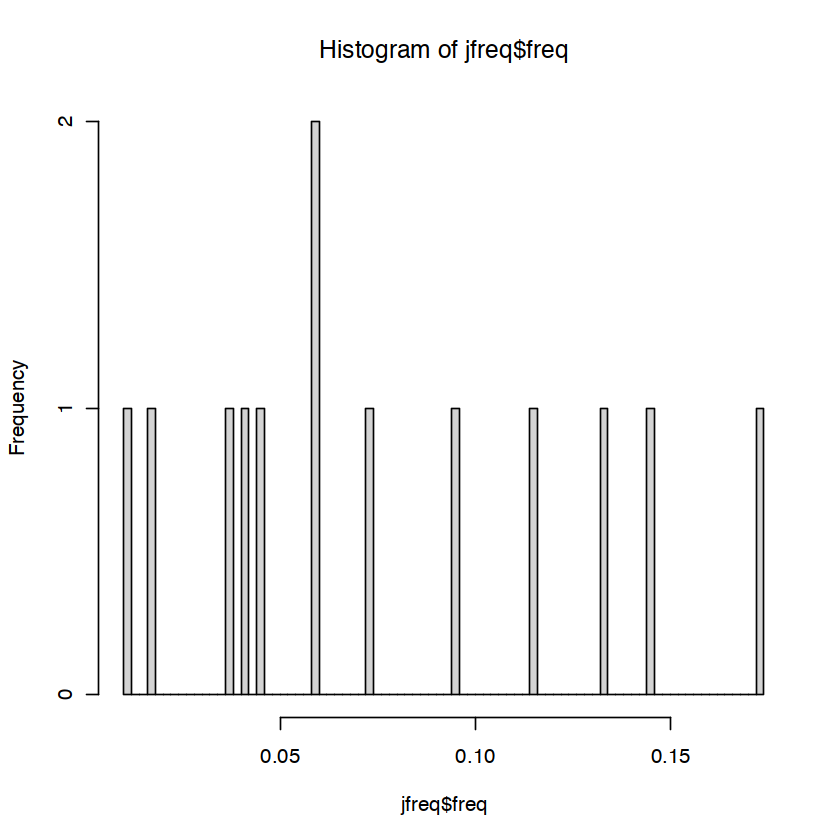

In [51]:
hist(jfreq$freq, breaks = 100)

In [52]:
jgene_mat <- as.data.frame.matrix(table(int_v_j_cdr3_l %>% select(basename, TRBJ  )))

In [53]:
head(jgene_mat)

,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-6,TRBJ2-7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP-328-04-PBMC-DNA,52,46,16,21,37,12,60,21,51,4,31,7,94
CHP-328-05-PBMC-DNA,22,13,4,5,8,3,25,9,19,4,5,1,33
CHP-351-03-PBMC-DNA,114,100,40,38,72,42,151,70,107,10,89,20,238
CHP-353-04-PBMC-DNA,359,269,73,83,138,82,159,78,96,5,87,26,239
CHP-363-04-PBMC-DNA,105,79,24,34,65,40,84,43,69,3,41,20,144
CHP-369-01-PBMC-DNA,76,62,26,25,46,16,95,51,82,10,53,12,173


In [54]:
readr::write_rds(jgene_mat, paste0(datapath, "capTCRseq/int__pbmc_jgene_matrix.rds"))

In [55]:
dim(jgene_mat)

[1] 258  13

In [56]:
cormat <- cor(jgene_mat)

In [57]:
#vgene_mat_hf[,c("TRBV10-3", "TRBV7-9", "TRBV13")]

In [58]:
summary(as.vector(cormat) )

# generally high correlation

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.6524  0.8824  0.9129  0.8909  0.9390  1.0000 

PCA

In [59]:
jgene_mat

,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-6,TRBJ2-7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP-328-04-PBMC-DNA,52,46,16,21,37,12,60,21,51,4,31,7,94
CHP-328-05-PBMC-DNA,22,13,4,5,8,3,25,9,19,4,5,1,33
CHP-351-03-PBMC-DNA,114,100,40,38,72,42,151,70,107,10,89,20,238
CHP-353-04-PBMC-DNA,359,269,73,83,138,82,159,78,96,5,87,26,239
CHP-363-04-PBMC-DNA,105,79,24,34,65,40,84,43,69,3,41,20,144
CHP-369-01-PBMC-DNA,76,62,26,25,46,16,95,51,82,10,53,12,173
CHP-371-03-PBMC-DNA,113,57,12,20,42,23,110,41,53,2,23,12,103
CHP-377-02-PBMC-DNA,83,73,18,31,49,26,61,39,42,3,24,11,53
CHP-386-04-PBMC-DNA,99,70,28,26,46,23,64,51,72,2,17,23,143


In [60]:
mypca <- prcomp(jgene_mat, scale = TRUE)

In [61]:
out <- mypca$x
mydf <- data.frame(out)

In [62]:
head(out)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
CHP-328-04-PBMC-DNA,-2.177149,-0.1661816,0.3687299,-0.2752007,-0.2077164,-0.60414725,-0.16201849,-0.01511295,0.43047095,0.03822050,0.01436271,-0.12182549,-0.10655211
CHP-328-05-PBMC-DNA,1.190934,-0.6575784,-0.2299612,-0.2202804,0.2093163,-0.09342315,-0.13692283,-0.27253515,-0.09391664,0.14894586,0.01185951,-0.04047046,0.05524235
CHP-351-03-PBMC-DNA,-9.601222,-1.0593635,1.6247639,-0.1968443,-1.0710003,-0.18135382,-0.80772967,0.82671338,0.19270228,0.04732945,-0.03199291,0.17698111,-0.07509704
CHP-353-04-PBMC-DNA,-15.586967,4.2694615,-1.8066360,1.6357500,-0.8766210,-0.14746343,0.46986389,-0.46606503,0.35418411,0.63144634,-0.48800149,0.11867217,-0.03119597
CHP-363-04-PBMC-DNA,-5.791357,1.0336797,1.2500966,0.8037380,0.6086951,0.14274773,-0.04513192,0.49346464,0.63107768,-0.24398997,-0.10398872,-0.05122336,-0.01076443
CHP-369-01-PBMC-DNA,-5.409429,-1.7081537,0.8792851,-0.2725720,-0.4129596,-0.69994928,-0.79020279,0.15719192,-0.07271708,0.19836678,-0.43235948,-0.08481869,0.07813747


In [63]:
p0 <- fviz_pca_ind(mypca,geom = "point", pointshape = 16, pointsize = 2, alpha = 1,
                    ellipse.alpha = 0, invisible="quali", repel = TRUE,
                       title = "PCA of frequent J genes (n = 13)")

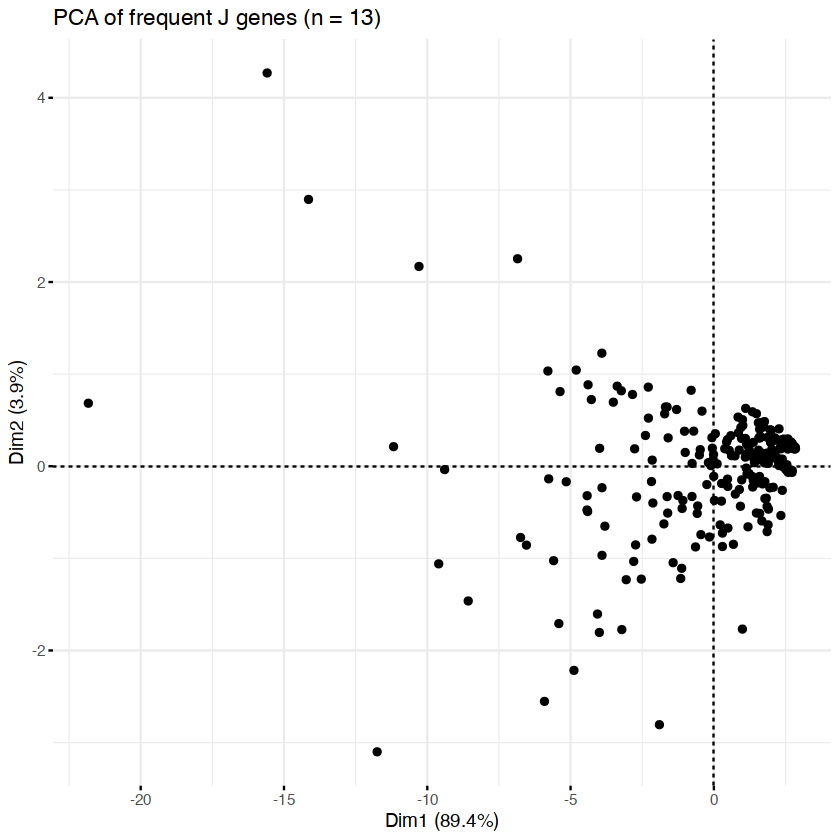

In [64]:
p0

In [65]:
readr::write_rds(mydf, paste0(datapath, "/capTCRseq/INT_PBMC_J_PCA_postqc.rds"))

# cfDNA

In [5]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [6]:
meta_div <- meta_div[ !is.na(meta_div$TRB), ]

In [7]:
table(meta_div$sampletype)


 PBMC Tumor cfDNA 
  221    17   266 

In [8]:
meta_div <- meta_div[ meta_div$sampletype == "cfDNA",]

In [9]:
head(meta_div)

,sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,estimated_Shannon,SE_Shannon,observed_Simpson,estimated_Simpson,SE_Simpson,basename,file,sampletype,Group,log10shann
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,CHP_323_03,CHP_323,X03,0,786.24,1,HR ALL,0,0,NA,...,43.456,0.145,31.052,31.063,0.159,CHP_323-03_cfDNA,batch3a9_cfDNA_10Jul2020/mixcr/clones/CLONES_TRBCHP_323-03_cfDNA.txt,cfDNA,CHP,1.6377198
2,CHP_323_05,CHP_323,X05,0,979.50,1,HR ALL,0,0,NA,...,8.686,0.093,6.804,6.812,0.134,CHP_323-05_cfDNA,remaining_batch_1_cfDNA_8April2021/mixcr/clones/CLONES_TRBCHP_323-05_cfDNA.txt,cfDNA,CHP,0.9380692
3,CHP_324_04,CHP_324,X04,0,0.00,12,T-ALL,0,0,NA,...,1.000,0.000,1.000,1.000,0.000,CHP_324-04_cfDNA,batch5_cfDNA_25Jun2020/mixcr/clones/CLONES_TRBCHP_324-04_cfDNA.txt,cfDNA,CHP,0.0000000
4,CHP_324_05,CHP_324,X05,0,0.00,12,T-ALL,0,0,NA,...,1.775,0.019,1.627,1.627,0.028,CHP_324-05_cfDNA,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_324-05_cfDNA.txt,cfDNA,CHP,0.2491984
5,CHP_326_05,CHP_326,X05,0,972.90,4,SR ALL,0,0,NA,...,16.475,0.087,14.065,14.075,0.099,CHP_326-05_cfDNA,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_326-05_cfDNA.txt,cfDNA,CHP,1.2165354
6,CHP_328_05,CHP_328,X05,0,91.16,7,SR ALL,0,0,NA,...,3.066,0.028,2.691,2.692,0.024,CHP_328-05_cfDNA,batch10_cfDNA_13Jul2020/mixcr/clones/CLONES_TRBCHP_328-05_cfDNA.txt,cfDNA,CHP,0.4864305


In [10]:
int_v_j_cdr3_l <- readr::read_rds(paste0(datapath, "capTCRseq/int_cfdna_v_j_cdr3_l.rds"))

In [11]:
head(int_v_j_cdr3_l)

,basename,aaSeqCDR3,cdr3_length,TRBV,TRBJ,cloneCount,cloneFraction
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>
1,CHP_323-03_cfDNA,CASSQGTEGGYTF,13,TRBV4-3,TRBJ1-2,7047,0.06883248
2,CHP_323-03_cfDNA,CSARGRGKGADTQYF,15,TRBV20-1,TRBJ2-3,5287,0.05164145
3,CHP_323-03_cfDNA,CASRSDEKLFF,11,TRBV28,TRBJ1-4,4084,0.03989099
4,CHP_323-03_cfDNA,CAISDGQDTDTQYF,14,TRBV10-3,TRBJ2-3,3884,0.03793747
6,CHP_323-03_cfDNA,CASSPSNTEAFF,12,TRBV19,TRBJ1-1,3533,0.03450903
8,CHP_323-03_cfDNA,CASPGTGLYNQPQHF,15,TRBV30,TRBJ1-5,3079,0.03007453


In [12]:
int_j <- int_v_j_cdr3_l %>% group_by(basename, TRBJ) %>% summarize(Jcount = sum(cloneCount)) %>% ungroup()

`summarise()` has grouped output by 'basename'. You can override using the
`.groups` argument.


In [13]:
head(int_j)

basename,TRBJ,Jcount
<chr>,<chr>,<int>
CHP_323-03_cfDNA,TRBJ1-1,6391
CHP_323-03_cfDNA,TRBJ1-2,12236
CHP_323-03_cfDNA,TRBJ1-3,6275
CHP_323-03_cfDNA,TRBJ1-4,7173
CHP_323-03_cfDNA,TRBJ1-5,9807
CHP_323-03_cfDNA,TRBJ1-6,2164


In [14]:
int_j_count <- tidyr::pivot_wider(int_j, names_from = "TRBJ", values_from = "Jcount", values_fill = 0)

In [15]:
head(int_j_count)

basename,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-7,TRBJ2-6
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP_323-03_cfDNA,6391,12236,6275,7173,9807,2164,3113,3244,17608,1452,2811,9259,0
CHP_323-05_cfDNA,1509,0,534,1183,558,0,393,0,151,1,0,609,0
CHP_324-04_cfDNA,0,0,0,7,0,0,0,0,0,0,0,0,0
CHP_324-05_cfDNA,0,0,0,446,1266,0,0,0,0,0,0,0,0
CHP_326-05_cfDNA,3580,4438,0,32,112,0,4270,453,1369,0,834,3495,0
CHP_328-05_cfDNA,668,2052,2223,0,0,129,0,0,0,0,0,0,0


In [16]:
int_j_count <- as.data.frame(int_j_count)
rownames(int_j_count) <- int_j_count$basename
int_j_count$basename <- NULL

In [17]:
head(int_j_count)

,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-7,TRBJ2-6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP_323-03_cfDNA,6391,12236,6275,7173,9807,2164,3113,3244,17608,1452,2811,9259,0
CHP_323-05_cfDNA,1509,0,534,1183,558,0,393,0,151,1,0,609,0
CHP_324-04_cfDNA,0,0,0,7,0,0,0,0,0,0,0,0,0
CHP_324-05_cfDNA,0,0,0,446,1266,0,0,0,0,0,0,0,0
CHP_326-05_cfDNA,3580,4438,0,32,112,0,4270,453,1369,0,834,3495,0
CHP_328-05_cfDNA,668,2052,2223,0,0,129,0,0,0,0,0,0,0


In [18]:
readr::write_rds(int_j_count, paste0(datapath, "capTCRseq/int_cfdna_j_count.rds"))

In [19]:
int_j <- int_v_j_cdr3_l %>% group_by(basename, TRBJ) %>% summarize(Jfrac = sum(cloneFraction)) %>% ungroup()

`summarise()` has grouped output by 'basename'. You can override using the
`.groups` argument.


In [20]:
head(int_j)

basename,TRBJ,Jfrac
<chr>,<chr>,<dbl>
CHP_323-03_cfDNA,TRBJ1-1,0.06242491
CHP_323-03_cfDNA,TRBJ1-2,0.11951670
CHP_323-03_cfDNA,TRBJ1-3,0.06129187
CHP_323-03_cfDNA,TRBJ1-4,0.07006320
CHP_323-03_cfDNA,TRBJ1-5,0.09579113
CHP_323-03_cfDNA,TRBJ1-6,0.02113715


In [21]:
int_j_fraction <- tidyr::pivot_wider(int_j, names_from = "TRBJ", values_from = "Jfrac", values_fill = 0)

In [22]:
int_j_fraction <- as.data.frame(int_j_fraction)
rownames(int_j_fraction) <- int_j_fraction$basename
int_j_fraction$basename <- NULL

In [23]:
readr::write_rds(int_j_fraction, paste0(datapath, "capTCRseq/int_cfdna_j_fraction.rds"))

In [11]:
# should be done for all files
jfreq <- int_v_j_cdr3_l %>% group_by(TRBJ) %>% tally() %>% arrange(desc(n)) %>% mutate(freq = n/sum(n))

In [12]:
jfreq

TRBJ,n,freq
<chr>,<int>,<dbl>
TRBJ1-1,634,0.17006438
TRBJ2-7,519,0.13921674
TRBJ1-2,458,0.12285408
TRBJ2-1,436,0.11695279
TRBJ2-3,356,0.09549356
TRBJ1-5,278,0.07457082
TRBJ1-4,212,0.05686695
TRBJ2-2,203,0.05445279
TRBJ2-5,180,0.04828326


In [13]:
readr::write_rds(jfreq, paste0(datapath, "capTCRseq/jfreq_int_cfdna.rds"))

In [14]:
summary(jfreq$freq)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.01207 0.04614 0.05687 0.07692 0.11695 0.17006 

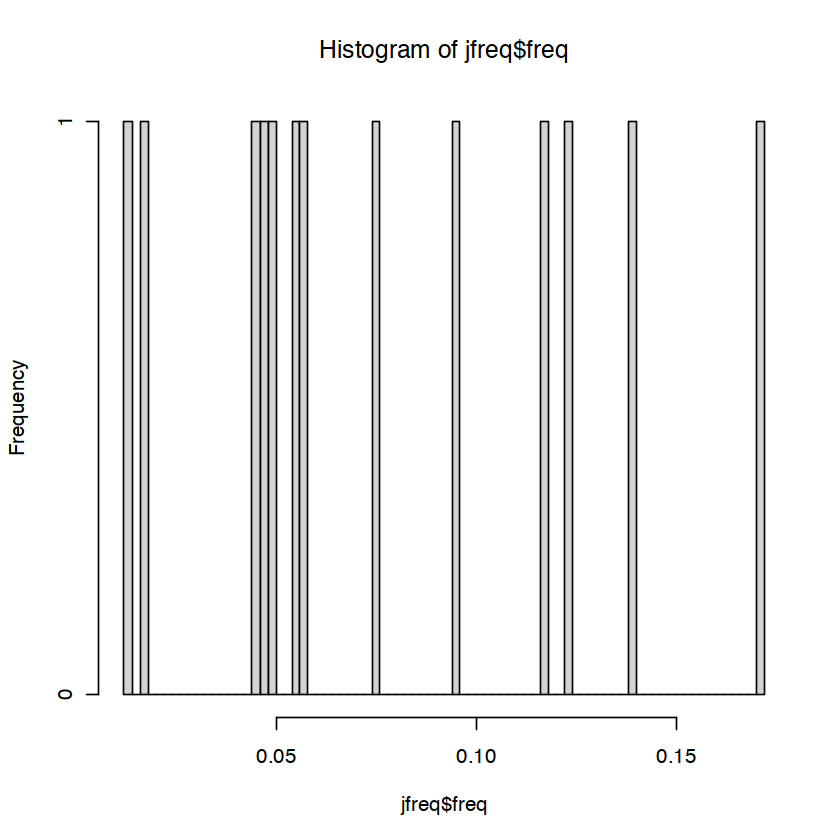

In [15]:
hist(jfreq$freq, breaks = 100)

In [16]:
jgene_mat <- as.data.frame.matrix(table(int_v_j_cdr3_l %>% select(basename, TRBJ  )))

In [17]:
head(jgene_mat)

,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-6,TRBJ2-7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP_323-03_cfDNA,9,10,5,8,10,7,8,5,13,1,7,0,15
CHP_323-05_cfDNA,2,0,2,3,1,0,1,0,1,1,0,0,4
CHP_324-04_cfDNA,0,0,0,1,0,0,0,0,0,0,0,0,0
CHP_324-05_cfDNA,0,0,0,1,1,0,0,0,0,0,0,0,0
CHP_326-05_cfDNA,4,5,0,1,1,0,6,1,2,0,1,0,3
CHP_328-05_cfDNA,2,1,1,0,0,1,0,0,0,0,0,0,0


In [18]:
readr::write_rds(jgene_mat, paste0(datapath, "capTCRseq/int_cfdna_jgene_matrix.rds"))

In [19]:
dim(jgene_mat)

[1] 266  13

In [20]:
cormat <- cor(jgene_mat)

In [21]:
#vgene_mat_hf[,c("TRBV10-3", "TRBV7-9", "TRBV13")]

In [22]:
summary(as.vector(cormat) )

# generally high correlation

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0784  0.4988  0.6197  0.6006  0.7284  1.0000 

PCA

In [23]:
jgene_mat

,TRBJ1-1,TRBJ1-2,TRBJ1-3,TRBJ1-4,TRBJ1-5,TRBJ1-6,TRBJ2-1,TRBJ2-2,TRBJ2-3,TRBJ2-4,TRBJ2-5,TRBJ2-6,TRBJ2-7
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
CHP_323-03_cfDNA,9,10,5,8,10,7,8,5,13,1,7,0,15
CHP_323-05_cfDNA,2,0,2,3,1,0,1,0,1,1,0,0,4
CHP_324-04_cfDNA,0,0,0,1,0,0,0,0,0,0,0,0,0
CHP_324-05_cfDNA,0,0,0,1,1,0,0,0,0,0,0,0,0
CHP_326-05_cfDNA,4,5,0,1,1,0,6,1,2,0,1,0,3
CHP_328-05_cfDNA,2,1,1,0,0,1,0,0,0,0,0,0,0
CHP_329-04_cfDNA,1,1,0,0,0,0,0,0,0,0,0,0,0
CHP_330-04_cfDNA,2,0,0,1,0,0,0,0,0,0,0,0,1
CHP_331-05_cfDNA,8,3,1,4,7,0,4,1,3,0,2,1,2


In [24]:
mypca <- prcomp(jgene_mat, scale = TRUE)

In [25]:
out <- mypca$x
mydf <- data.frame(out)

In [26]:
head(out)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
CHP_323-03_cfDNA,-12.2473929,-1.42025844,-1.04697016,3.1583523,1.91914930,0.8869808,1.0809660,-1.8005925,-1.50986109,0.26102737,-1.3018701,-0.4439798428,0.03704843
CHP_323-05_cfDNA,-0.2918142,-1.03382807,0.68828218,0.6123784,-0.09284711,0.3084909,-1.6981223,-0.8380078,-0.36609315,0.70883303,-0.6825703,0.1816493829,-0.06508933
CHP_324-04_cfDNA,1.7122042,0.09042876,-0.07326199,-0.2046221,0.29371847,0.1924127,-0.1858385,-0.2642570,-0.18545217,0.39428757,-0.1183820,0.1349846217,-0.20298198
CHP_324-05_cfDNA,1.5349325,0.14012792,-0.08421036,-0.1093266,0.42138154,0.4949083,-0.2068940,-0.3302963,-0.27659018,-0.02188041,-0.1707117,0.0941779720,-0.10720903
CHP_326-05_cfDNA,-0.9056822,0.51843452,-0.90888221,-0.3433747,-0.69230060,0.6991146,0.3068189,0.6303601,0.88435273,0.37676333,-0.1045811,0.7938390648,0.10374633
CHP_328-05_cfDNA,1.2267221,0.09263065,0.06769804,0.6608868,0.15485154,-0.7117561,-0.2064226,0.1944209,-0.03176118,-0.01432308,0.2282086,-0.0008477003,-0.09297560


In [28]:
p0 <- fviz_pca_ind(mypca,geom = "point", pointshape = 16, pointsize = 2, alpha = 1,
                    ellipse.alpha = 0, invisible="quali", repel = TRUE,
                       title = "PCA of frequent J genes (n = 13)")

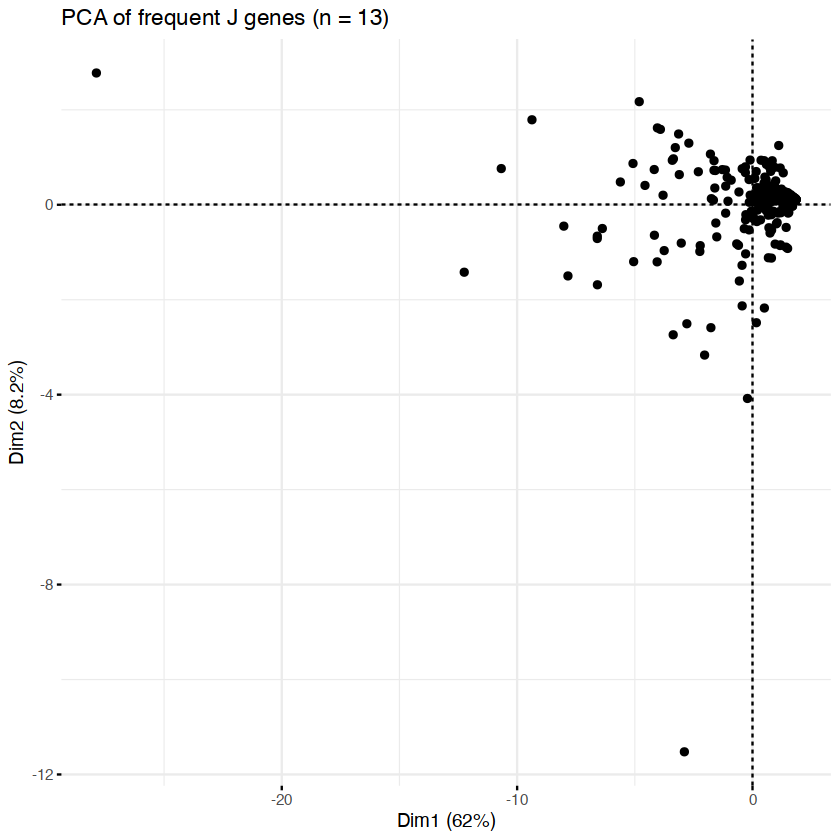

In [29]:
p0

In [30]:
readr::write_rds(mydf, paste0(datapath, "/capTCRseq/INT_cfDNA_J_PCA_postqc.rds"))